In [1]:
from pylab import *
import nylib, nylib2, cjlib
import bloch
import pulse
%matplotlib inline

In [2]:
# B1ave = Aarea * B1
100 - (5/100.)*100

95.0

In [3]:
reload(pulse)
satPulseBp = pulse.returnPulse('bp', 0.1, 0.005, flipAngle=None, pulseAmplitude=0.2)

BpArray = ones((1,102))
BpArray = squeeze(BpArray*0.2)
# print  sqrt(mean(BpArray**2))
print  sqrt(sum(BpArray**2)/105.)

0.2
0.1971221521218325


In [4]:
reload(pulse)
satPulseGaussian = pulse.returnPulse('gaussian', 0.1, 0.005, flipAngle=235., pulseAmplitude=None)

# print sqrt(mean((satPulseGaussian[:,1]/42.58)**2))
print  sqrt(sum((satPulseGaussian[:,1]/42.58)**2)/105.)

0.19732521165149464


In [5]:
satPulseSg = pulse.returnPulse('sg', 0.1, 0.005, flipAngle=260, pulseAmplitude=None)

# print sqrt(mean((satPulseSg[:,1]/42.58)**2))
print  sqrt(sum((satPulseSg[:,1]/42.58)**2)/105.)

0.19631177888466242


In [6]:
# plot the data along with the fits
import bloch
import pulse

cestFreq = linspace(-6,6,121)

pulseRepeats =  int(4/(0.1+0.005))

# # glucose
sol1 = bloch.Pool('sol1', t1 = 1, t2 = 0.1, lifetime = 1/30.,  chemical_shift = 3.5, concentration = 72.)
macromolecular = bloch.Pool('macromolecular', t1 = 1, t2 = 9e-6, lifetime = 1/40.,  chemical_shift = 0.0001, concentration = 0.001)
freewater = bloch.Pool('freewater', t1 = 1.6, t2 = 0.062, lifetime = 1., chemical_shift = -0.0001, concentration = 111200)
poolsBaseline = (freewater, sol1,  macromolecular)



simulationMatrixCest_1= bloch.solve(poolsBaseline, cestFreq, satPulseBp, crusher=False, magnetic_field=7.0,
                         pulse_repeat = pulseRepeats, post_dynamic_delay=5)[2*len(poolsBaseline),:,-1]
simulationMatrixCest_2= bloch.solve(poolsBaseline, cestFreq, satPulseGaussian, crusher=False, magnetic_field=7.0,
                         pulse_repeat = pulseRepeats, post_dynamic_delay=5)[2*len(poolsBaseline),:,-1]
simulationMatrixCest_3= bloch.solve(poolsBaseline, cestFreq, satPulseSg, crusher=False, magnetic_field=7.0,
                         pulse_repeat = pulseRepeats, post_dynamic_delay=5)[2*len(poolsBaseline),:,-1]
# simulationMatrixCest_4= bloch.solve(poolsBaseline, cestFreq, satPulseSinc, crusher=False, magnetic_field=7.0,
#                          pulse_repeat = pulseRepeats, post_dynamic_delay=5)[2*len(poolsBaseline),:,-1]    


In [7]:

satPulse = zeros((1, 3))
satPulse[0,0] = 0
satPulse[0,1] = 0.2*42.57
satPulse[0,2] = 4

simulationMatrixCest_4= bloch.solve(poolsBaseline, cestFreq, satPulse, crusher=False, magnetic_field=7.0,pulse_repeat = 1, post_dynamic_delay=5)[2*len(poolsBaseline),:,-1]
  

Text(0,0.5,'S/S$_0$ (%)')

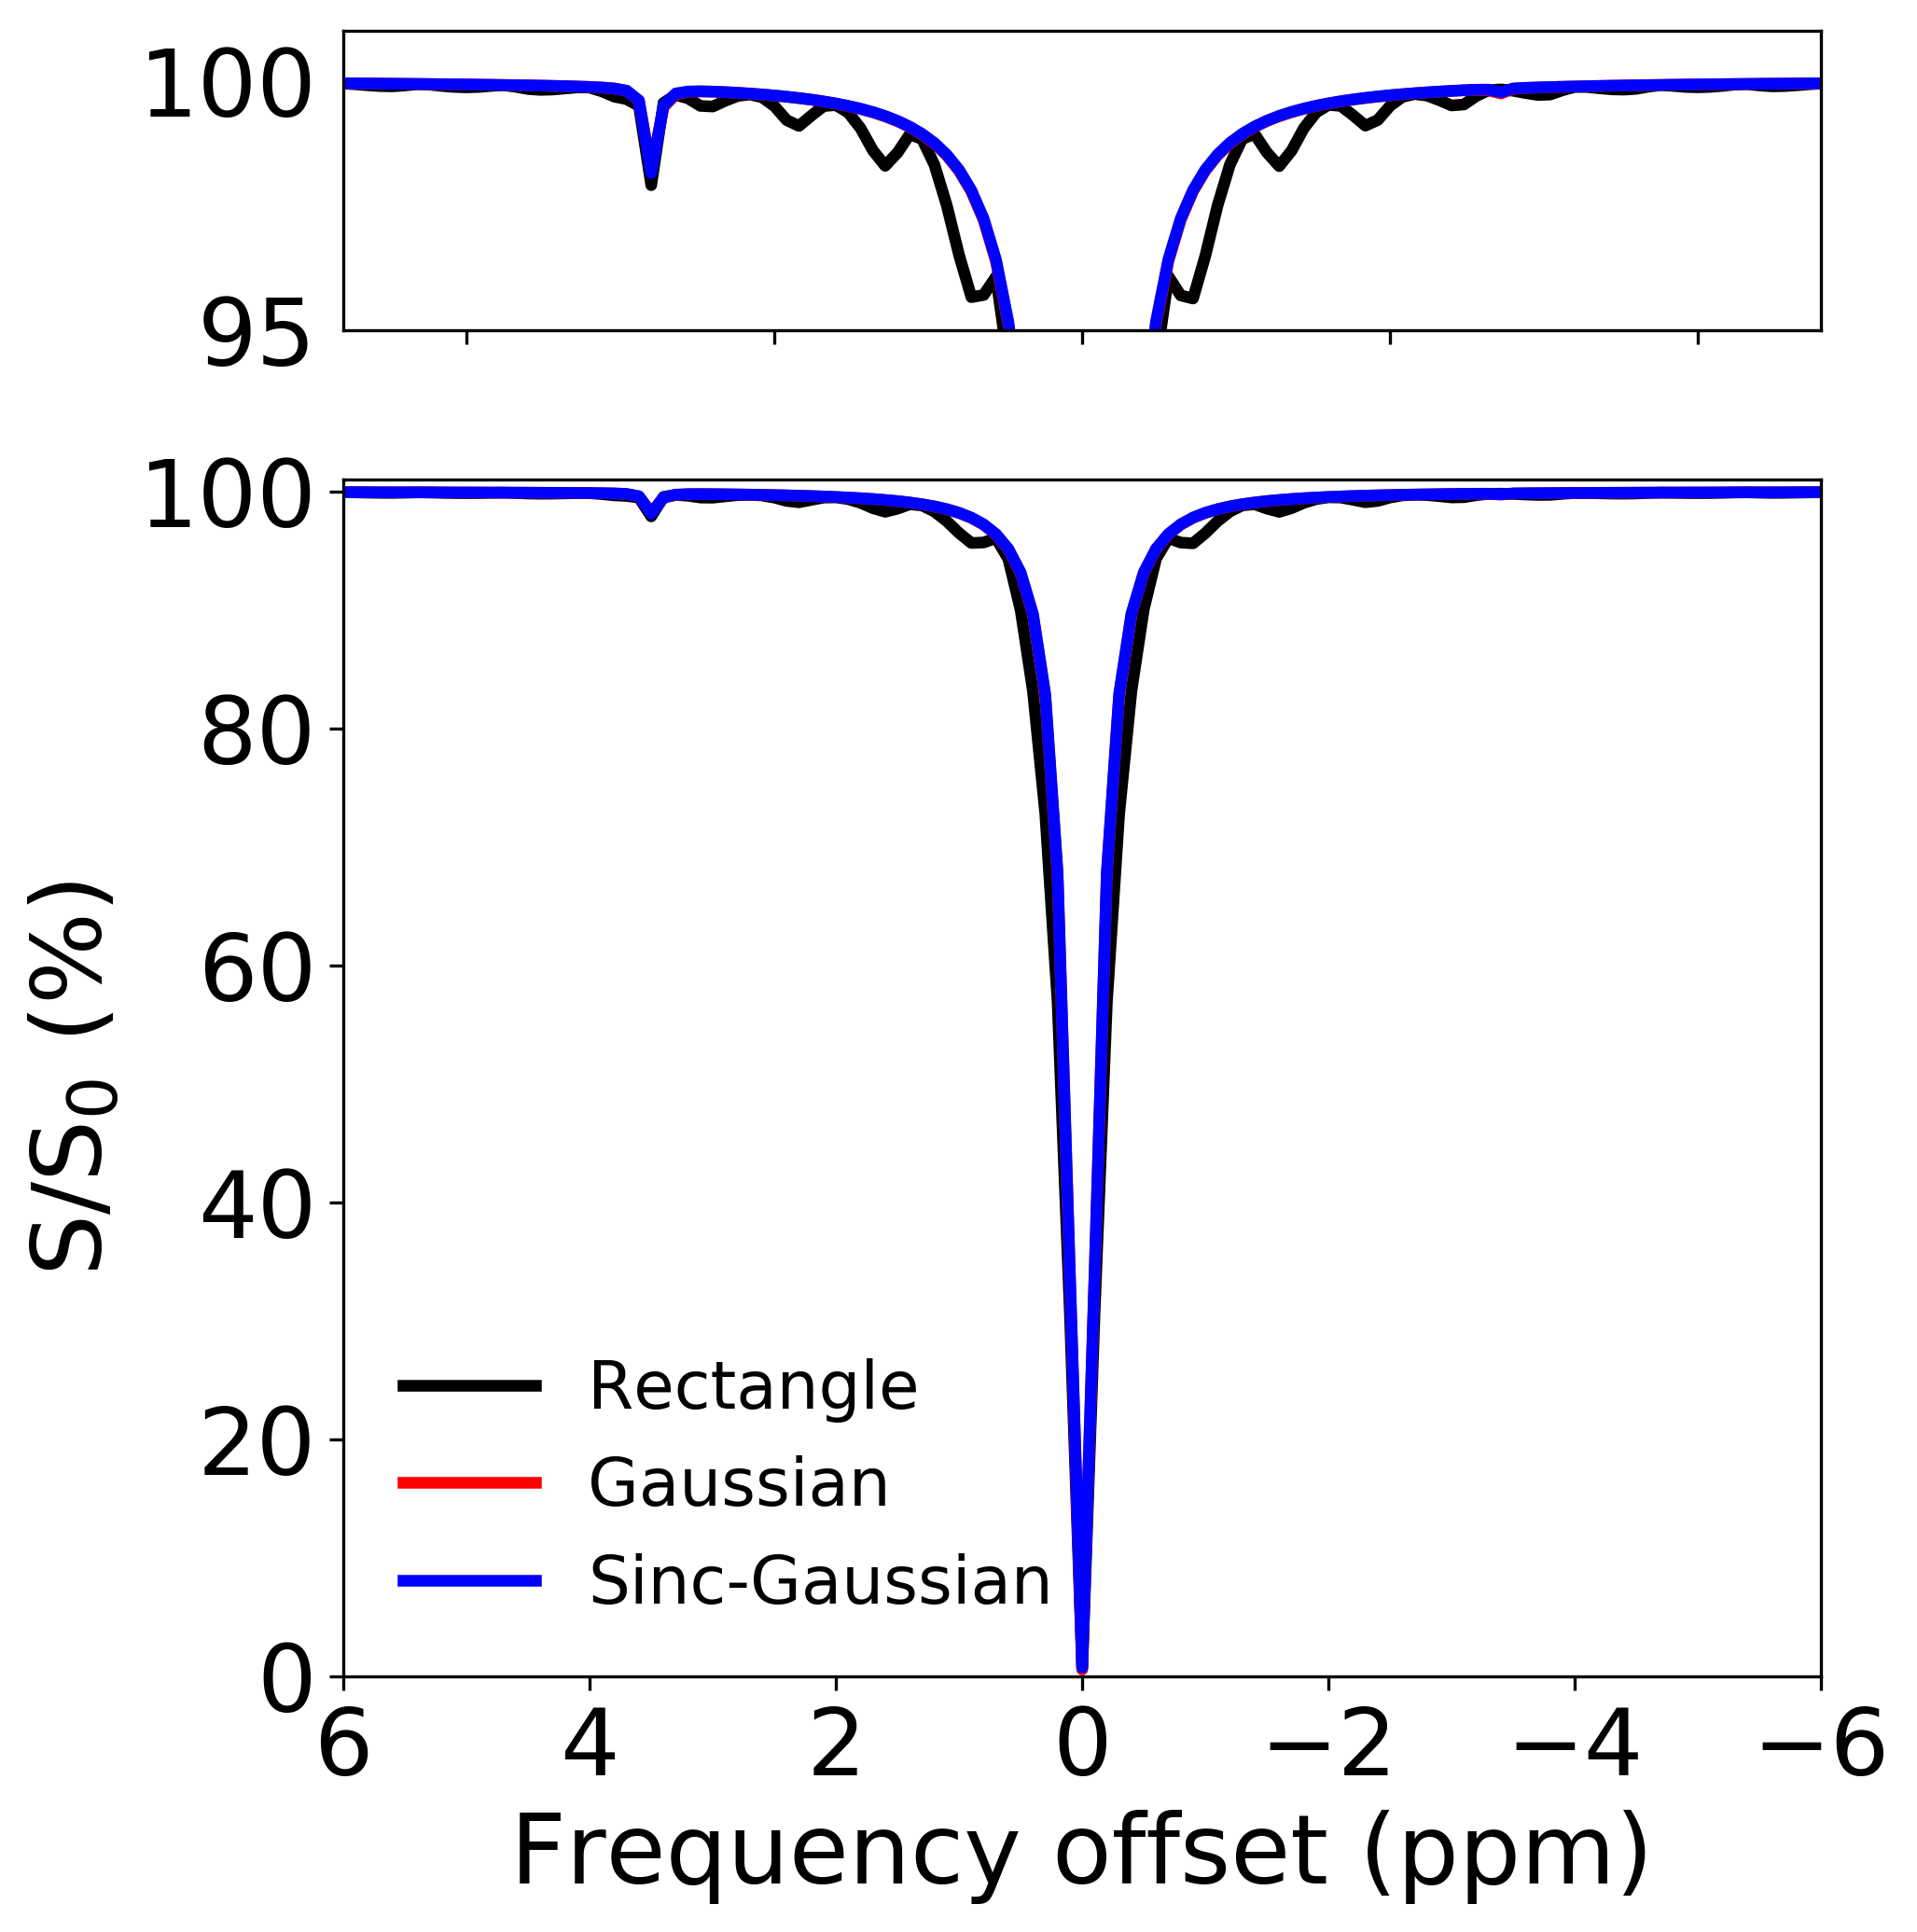

In [15]:
# plot data
from matplotlib import gridspec
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('10')

# bbox_props = dict(boxstyle="round", fc="w", ec="w", alpha=0.9)
figure(figsize=(6,7),dpi=300)
# clf()
gs1 = gridspec.GridSpec(4, 1)
gs1.update(left=0.1, right=0.98, bottom = 0.08, top = 0.92, wspace=0.1, hspace = 0.5)
ax1 = plt.subplot(gs1[0, 0])
ax1.plot(cestFreq, simulationMatrixCest_1*100, 'k-', lw = 3, label='Rectangle')
ax1. plot(cestFreq, simulationMatrixCest_2*100, 'r-',  lw = 3, label='Gaussian')
ax1.plot(cestFreq, simulationMatrixCest_3*100, 'b-', lw = 3, label='Sinc-Gaussian')
# ax1.plot(cestFreq, simulationMatrixCest_4*100, 'g-', lw = 3, label='CW')
ylim(95, 101)
xlim(cestFreq.max(), cestFreq.min())
tick_params(left = False, right = False , labelleft = True ,
                labelbottom = False, bottom = True)
# xlim(6, -6)
tick_params(labelsize=24)

ax2 = plt.subplot(gs1[1:, 0])
ax2.plot(cestFreq, simulationMatrixCest_1*100, 'k-', lw = 3, label='Rectangle')
ax2. plot(cestFreq, simulationMatrixCest_2*100, 'r-',  lw = 3, label='Gaussian')
ax2.plot(cestFreq, simulationMatrixCest_3*100, 'b-', lw = 3, label='Sinc-Gaussian')
# ax2.plot(cestFreq, simulationMatrixCest_4*100, 'g-', lw = 3, label='CW')

legend()
xlim(cestFreq.max(), cestFreq.min())
ylim(0,101)
tick_params(labelsize=24)
legend(loc='lower left',frameon=False, fontsize=17)
xlabel('Frequency offset (ppm)',fontsize=25)
xticks([6, 4, 2, 0, -2, -4, -6])
# xticks([6, 5, 4, 3, 2, 1, 0, -1, -2, -3, -4, -5, -6])
# xlabel(u'\u0394'+u'\u03C9',fontsize=15)
ylabel('S/S$_0$ (%)',fontsize=25)

In [9]:
# plot the data along with the fits
import bloch
import pulse

cestFreq = linspace(-6,6,121)

pulseRepeats =  int(4/(0.05+0.001))

sol1 = bloch.Pool('sol1', t1 = 1, t2 = 0.1, lifetime = 1/30.,  chemical_shift = 3.5, concentration = 72.)
macromolecular = bloch.Pool('macromolecular', t1 = 1, t2 = 9e-6, lifetime = 1/40.,  chemical_shift = 0.0001, concentration = 0.001)
freewater = bloch.Pool('freewater', t1 = 1.6, t2 = 0.062, lifetime = 1., chemical_shift = -0.0001, concentration = 111200)
poolsBaseline = (freewater, sol1,  macromolecular)


simulationMatrixCest_1= bloch.solve(poolsBaseline, cestFreq, satPulseBp, crusher=False, magnetic_field=3.0,
                         pulse_repeat = pulseRepeats, post_dynamic_delay=5)[2*len(poolsBaseline),:,-1]
simulationMatrixCest_2= bloch.solve(poolsBaseline, cestFreq, satPulseGaussian, crusher=False, magnetic_field=3.0,
                         pulse_repeat = pulseRepeats, post_dynamic_delay=5)[2*len(poolsBaseline),:,-1]
simulationMatrixCest_3= bloch.solve(poolsBaseline, cestFreq, satPulseSg, crusher=False, magnetic_field=3.0,
                         pulse_repeat = pulseRepeats, post_dynamic_delay=5)[2*len(poolsBaseline),:,-1]
# simulationMatrixCest_4= bloch.solve(poolsBaseline, cestFreq, satPulseSinc, crusher=False, magnetic_field=3.0,
#                          pulse_repeat = pulseRepeats, post_dynamic_delay=5)[2*len(poolsBaseline),:,-1]


In [10]:

satPulse = zeros((1, 3))
satPulse[0,0] = 0
satPulse[0,1] = 0.2*42.57
satPulse[0,2] = 4

simulationMatrixCest_4= bloch.solve(poolsBaseline, cestFreq, satPulse, crusher=False, magnetic_field=7.0,pulse_repeat = 1, post_dynamic_delay=5)[2*len(poolsBaseline),:,-1]
  

Text(0,0.5,'S/S$_0$ (%)')

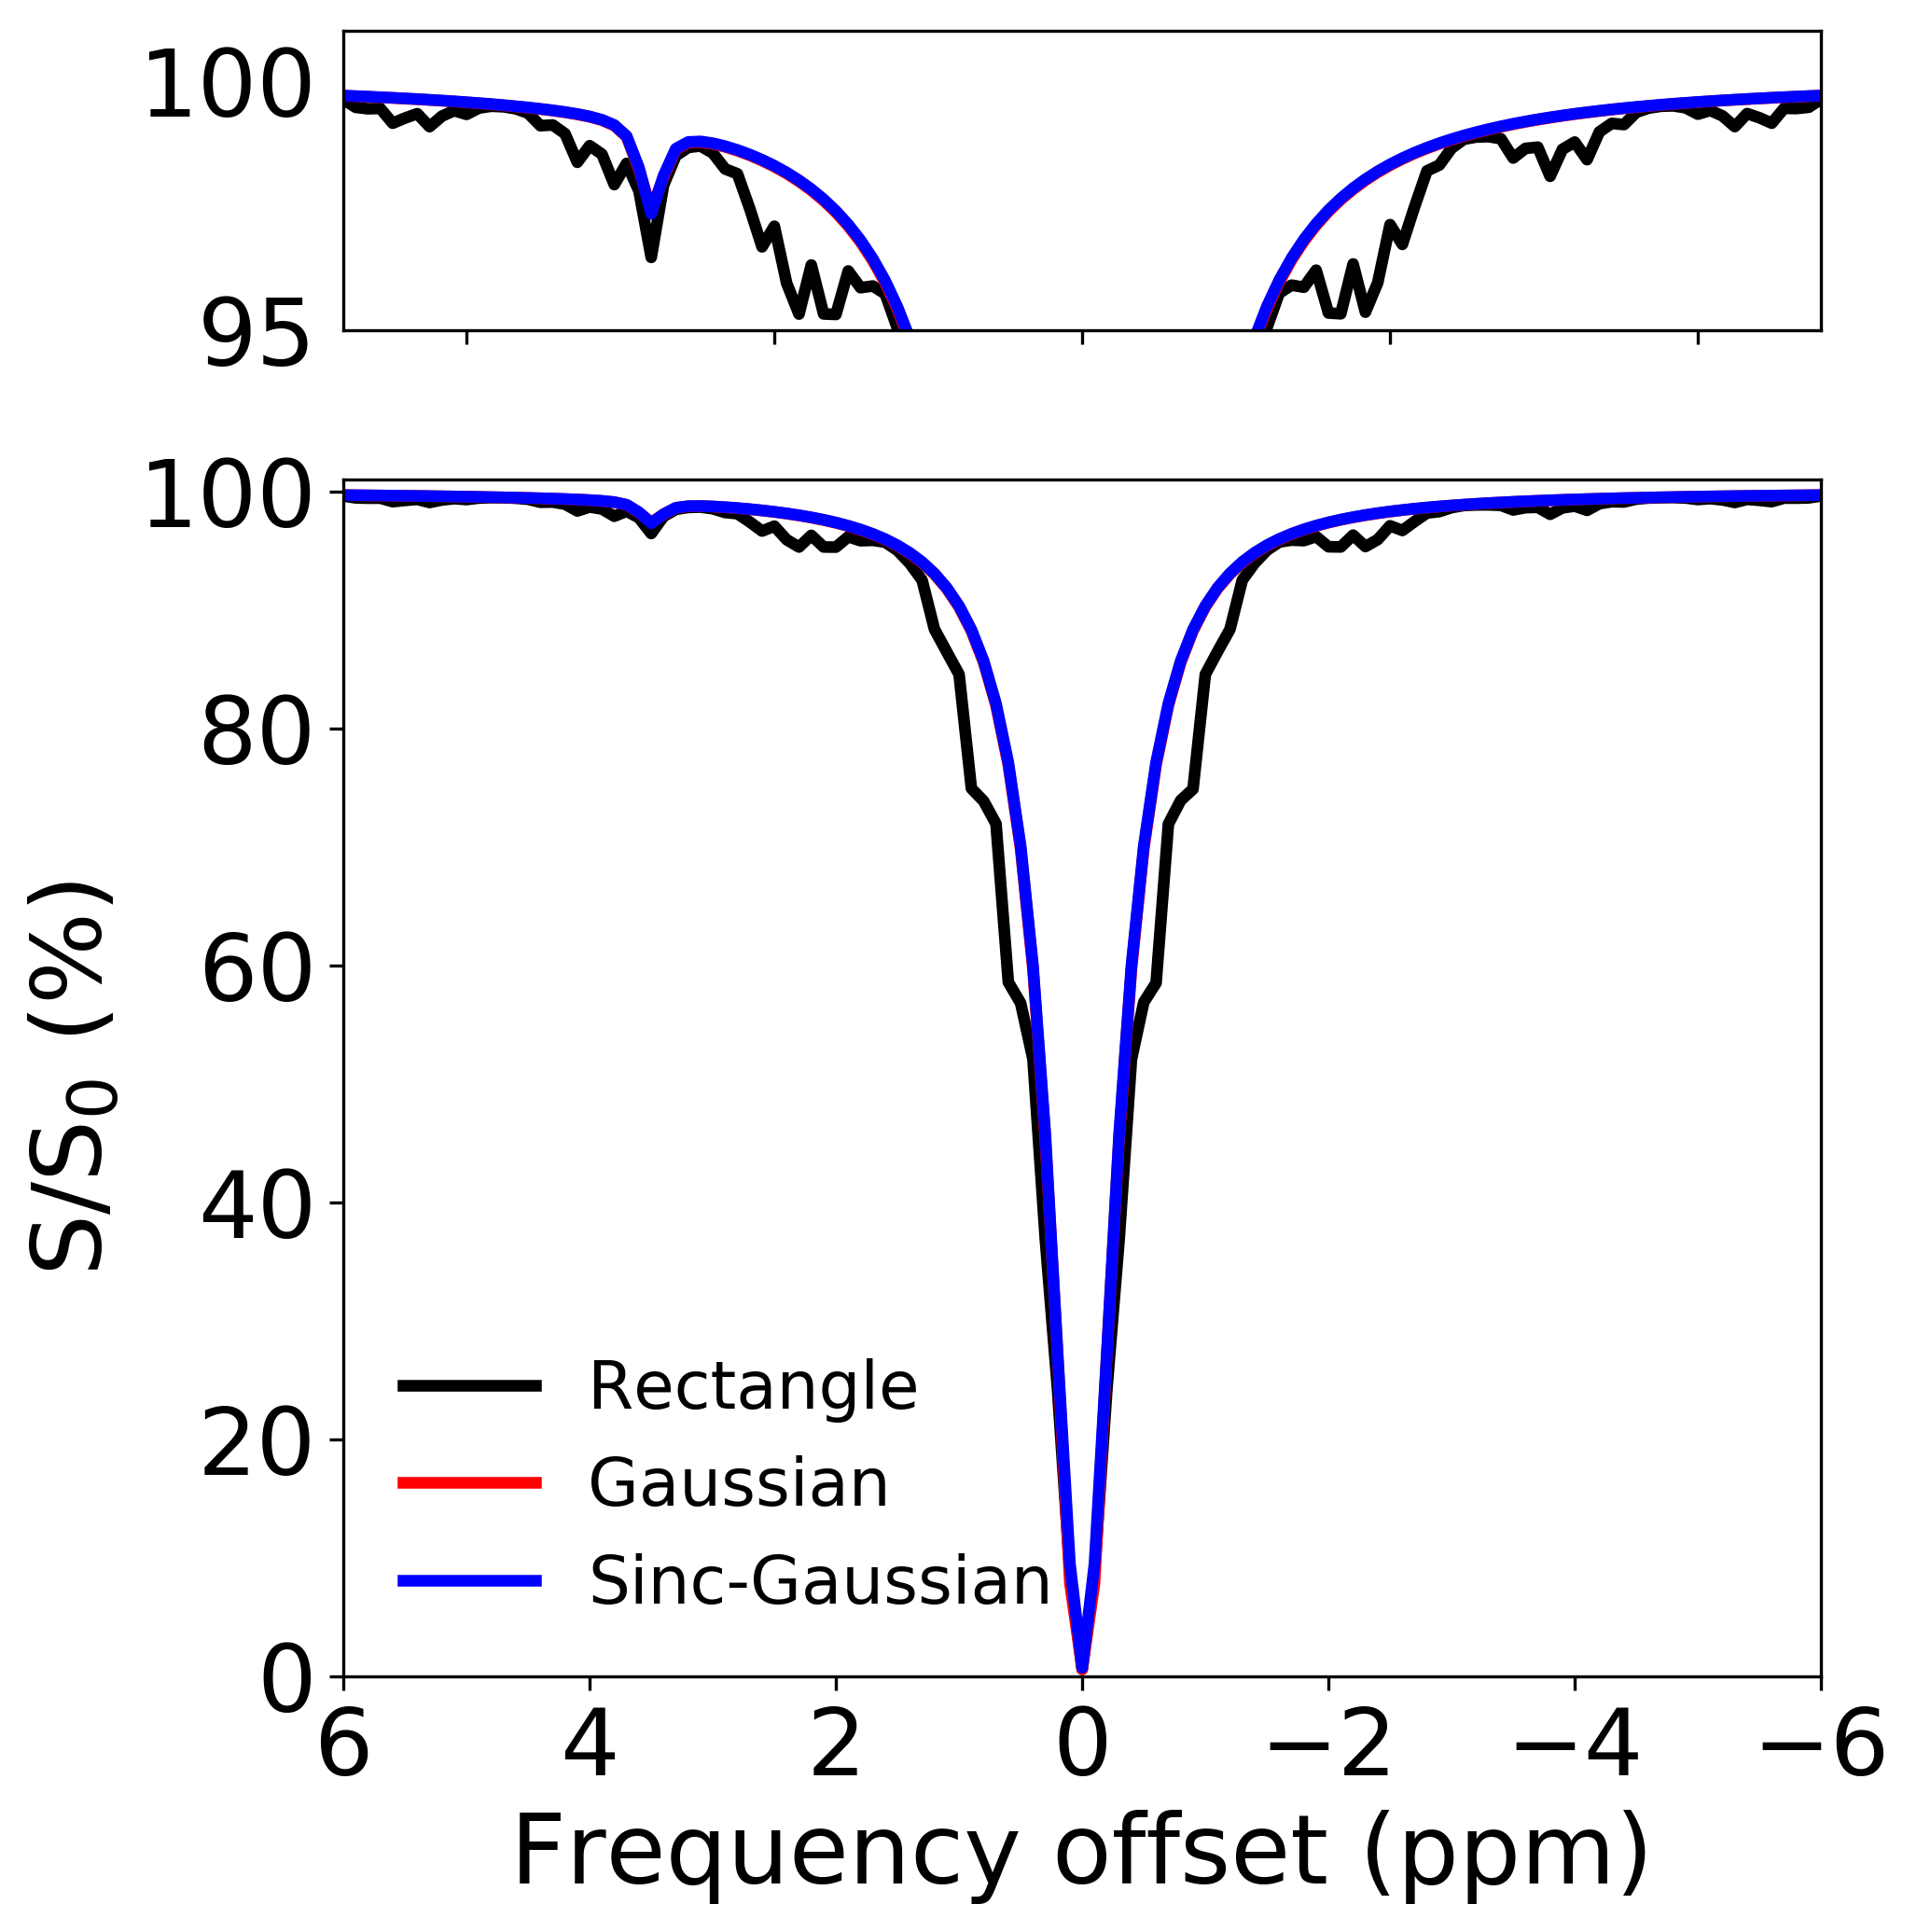

In [11]:
# plot data
from matplotlib import gridspec
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('10')

# bbox_props = dict(boxstyle="round", fc="w", ec="w", alpha=0.9)
figure(figsize=(6,7),dpi=300)
# clf()
gs1 = gridspec.GridSpec(4, 1)
gs1.update(left=0.1, right=0.98, bottom = 0.08, top = 0.92, wspace=0.1, hspace = 0.5)
ax1 = plt.subplot(gs1[0, 0])
ax1.plot(cestFreq, simulationMatrixCest_1*100, 'k-', lw = 3, label='Rectangle')
ax1. plot(cestFreq, simulationMatrixCest_2*100, 'r-',  lw = 3, label='Gaussian')
ax1.plot(cestFreq, simulationMatrixCest_3*100, 'b-', lw = 3, label='Sinc-Gaussian')
# ax1.plot(cestFreq, simulationMatrixCest_4*100, 'g-', lw = 3, label='CW')
ylim(95, 101)
xlim(cestFreq.max(), cestFreq.min())
tick_params(left = False, right = False , labelleft = True ,
                labelbottom = False, bottom = True)
# xlim(6, -6)
tick_params(labelsize=24)

ax2 = plt.subplot(gs1[1:, 0])
ax2.plot(cestFreq, simulationMatrixCest_1*100, 'k-', lw = 3, label='Rectangle')
ax2. plot(cestFreq, simulationMatrixCest_2*100, 'r-',  lw = 3, label='Gaussian')
ax2.plot(cestFreq, simulationMatrixCest_3*100, 'b-', lw = 3, label='Sinc-Gaussian')
# ax2.plot(cestFreq, simulationMatrixCest_4*100, 'g-', lw = 3, label='CW')

legend()
xlim(cestFreq.max(), cestFreq.min())
ylim(0,101)
tick_params(labelsize=24)
legend(loc='lower left',frameon=False, fontsize=17)
xlabel('Frequency offset (ppm)',fontsize=25)
xticks([6, 4, 2, 0, -2, -4, -6])
# xticks([6, 5, 4, 3, 2, 1, 0, -1, -2, -3, -4, -5, -6])
# xlabel(u'\u0394'+u'\u03C9',fontsize=15)
ylabel('S/S$_0$ (%)',fontsize=25)